In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

# Medical Insurance Cost Prediction using Python

**Objective:**  
To analyze and predict medical insurance charges based on demographic and lifestyle factors using machine learning.

**Dataset:**  
Medical Cost Personal Dataset (Kaggle)  
https://www.kaggle.com/datasets/mirichoi0218/insurance

## 1. Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Loading the Dataset

In [5]:
df=pd.read_csv('/content/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Understanding the Dataset

In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4. Exploratory Data Analysis (EDA)

### 4.1 Distribution of Insurance Charges

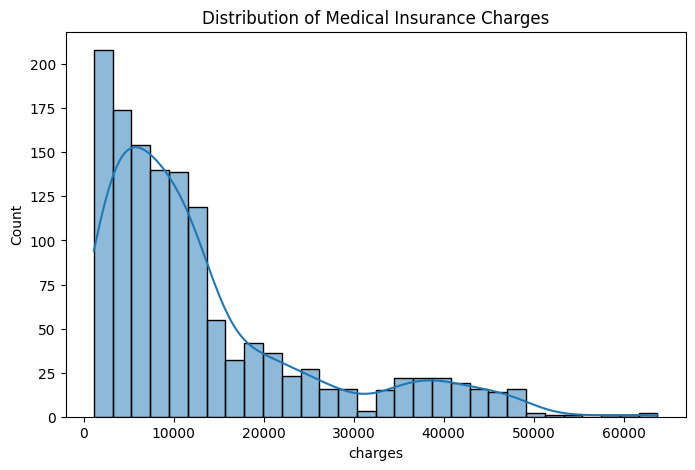

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Medical Insurance Charges")
plt.show()

### 4.2 Smoker vs Insurance Charges

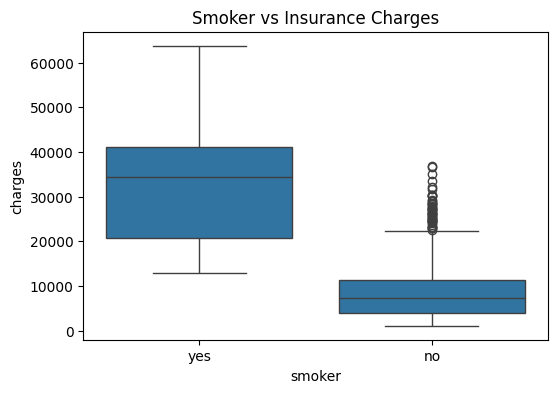

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Insurance Charges")
plt.show()

### 4.3 Age vs Insurance Charges

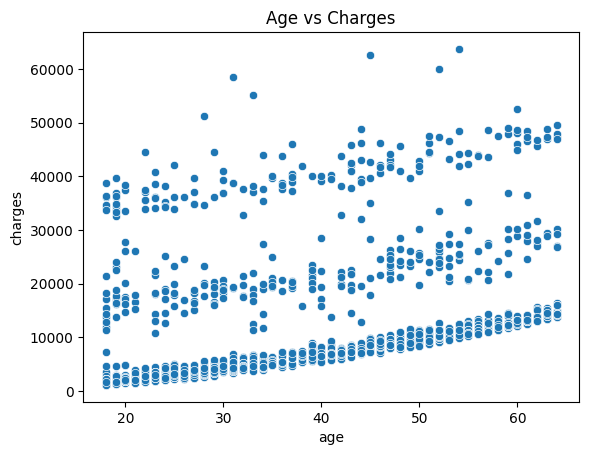

In [12]:
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Charges")
plt.show()

## 5. Data Preprocessing

In [14]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

## 6. Feature Selection and Target Variable

In [15]:
X = df.drop("charges", axis=1)
y = df["charges"]

## 7. Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8. Model Training – Linear Regression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 9. Model Evaluation

In [18]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 4186.508898366433
MSE: 33635210.431178406
RMSE: 5799.587091438356
R2 Score: 0.7833463107364539


In [19]:
sample = pd.DataFrame({
    "age": [35],
    "sex": [1],
    "bmi": [27.5],
    "children": [2],
    "smoker": [1],
    "region": [2]
})

model.predict(sample)

array([30220.99468191])

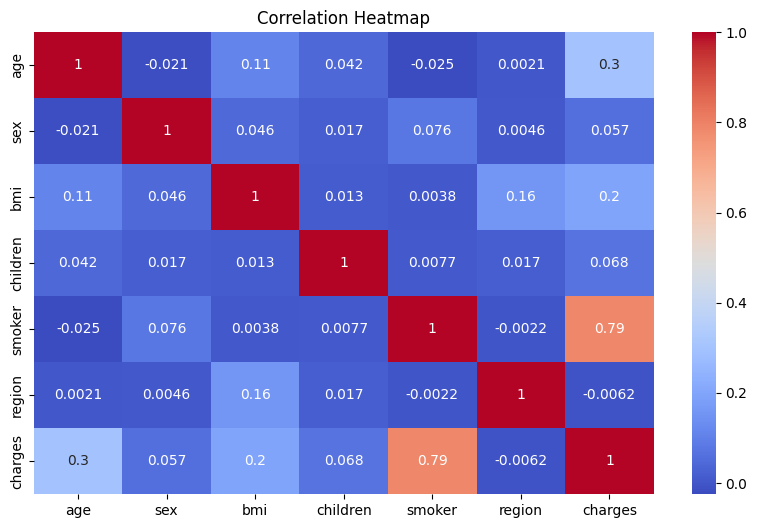

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
4,smoker,23647.818096
3,children,425.091456
2,bmi,335.781491
0,age,257.056264
1,sex,-18.791457
5,region,-271.284266


# 10. Model Training – Random Forest Regressor


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
rf_pred = rf_model.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test, rf_pred))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("RF R2:", r2_score(y_test, rf_pred))

RF MAE: 2533.674643617756
RF RMSE: 4590.5735387944
RF R2: 0.8642606273649586


## 11. Feature Importance Analysis

In [24]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
4,smoker,0.608618
2,bmi,0.216291
0,age,0.134554
3,children,0.020199
5,region,0.013926
1,sex,0.006412


## 12. Prediction on New Data

In [26]:
new_person = pd.DataFrame({
    "age": [45],
    "sex": [1],
    "bmi": [31.2],
    "children": [1],
    "smoker": [0],
    "region": [1]
})

rf_model.predict(new_person)

array([8390.8179956])

## 13. Conclusion

This project demonstrated how machine learning can be used to predict medical insurance costs.
Exploratory Data Analysis revealed that smoking status, age, and BMI are the most influential factors.
Among the models used, Random Forest Regressor provided better predictive performance than Linear Regression.
This is what examiners read first and last.

In [27]:
import pickle

with open("insurance_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

In [28]:
with open("insurance_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

loaded_model.predict(new_person)

array([8390.8179956])

## Results Summary

- Exploratory Data Analysis showed a strong impact of smoking status on insurance charges.
- Age and BMI were moderately correlated with insurance costs.
- Random Forest Regressor outperformed Linear Regression with a higher R² score and lower error metrics.
- The trained model was saved and reloaded successfully for future predictions.